# Telecom Churn - Case Study

### By : Sachin Shokeen 
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.We focus on usage based churn in this case study.


# Business Goals 
To analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

Identify the main indicators of churn.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 


## Step 1 - Data Preparation

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# For visualization

import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib.pyplot import xticks
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Reading the data

df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# Dimensions of the dataset

df.shape

(99999, 226)

In [4]:
# Checking the columns 

pd.DataFrame(df.columns)


,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
...,...
221,aon
222,aug_vbc_3g
223,jul_vbc_3g
224,jun_vbc_3g


# Data Cleaning 

In [5]:
# Data Quality Check & Missing Values 

# 1.Finding the %age of missing values for all the columns

print(df.isna().mean().round(4) * 100)


mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64


In [6]:
# 2.Remove columns with greater than 40% of missing values 

df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>40)].columns, 1)

In [7]:
# Checking for remaining missing values 

print(df.isna().mean().round(4) * 100)



mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 186, dtype: float64


## Filtering the High Value Customers right away 
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average
recharge amount in the first two months (the good phase).

In [8]:
# We will need to change the datatype as all columns are object type and clearly we can see there are numeric and date columns

df[['total_rech_amt_6',
'total_rech_amt_7',
'total_rech_amt_8',
'total_rech_amt_9',
'max_rech_amt_6', 
'max_rech_amt_7',
'max_rech_amt_8',
'max_rech_amt_9']] = df[['total_rech_amt_6',
'total_rech_amt_7',
'total_rech_amt_8',
'total_rech_amt_9',
'max_rech_amt_6', 
'max_rech_amt_7',
'max_rech_amt_8',
'max_rech_amt_9']].apply(pd.to_numeric) 
print(df.dtypes) 

df[['arpu_6', 'arpu_7', 'arpu_8', 'aon', 'jun_vbc_3g',
        'jul_vbc_3g', 'aug_vbc_3g',  'monthly_3g_6']]=df[['arpu_6', 'arpu_7', 'arpu_8', 'aon', 'jun_vbc_3g',
        'jul_vbc_3g', 'aug_vbc_3g', 'monthly_3g_6']].apply(pd.to_numeric) 

df[['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]=df[['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].apply(pd.to_numeric) 

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 186, dtype: object


In [9]:
# Checking the datatypes

df.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 186, dtype: object

In [10]:

# Those who have recharged with an amount more than or equal to X, where X is the 70th percentile
# of the average recharge amount in the first two months (the good phase). 

df['total_rech_amt'] = df['total_rech_amt_6'] + df['total_rech_amt_7']
print(df['total_rech_amt'].describe(percentiles = [0.7]))


count    99999.000000
mean       650.477585
std        741.666932
min          0.000000
50%        458.000000
70%        737.000000
max      75525.000000
Name: total_rech_amt, dtype: float64


In [11]:
df = df[df['total_rech_amt'] >= 737].reset_index(drop=True)
print("\n Total High Value Customer Count is {}".format(df.shape[0]))


 Total High Value Customer Count is 30011


# Step 2 - Data Cleaning 

As we have filtered the high value customers , we shall now focus on the next steps of handling nulls , missing values and outliers.

In [12]:
# Data Quality Check & Missing Values 
# 1.Finding the %age of missing values for all the columns
print(df.isna().mean().round(4) * 100)

# 2.Remove columns with high %age of missing value 
# df.dropna(thresh=df.shape[0]*0.4,how='all',axis=1)



mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    0.38
std_og_t2o_mou    0.38
loc_ic_t2o_mou    0.38
                  ... 
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
total_rech_amt    0.00
Length: 187, dtype: float64


In [13]:
# Fill all NaN with median values, after cross-checking.

df = df.fillna(df.median())

In [14]:
# Filling Last Recharge is the last date of the month so we fill the nulls with the mode of the column 

df['date_of_last_rech_6'].mode() # 6/30/2014
df['date_of_last_rech_7'].mode() # 7/31/2014
df['date_of_last_rech_8'].mode() # 8/31/2014 


0    8/31/2014
dtype: object

In [15]:
# Imputing the Missing Values with Mode 

df['date_of_last_rech_8'] = df['date_of_last_rech_8'].replace(np.nan, '8/31/2014')
df['date_of_last_rech_7'] = df['date_of_last_rech_7'].replace(np.nan, '7/31/2014')
df['date_of_last_rech_6'] = df['date_of_last_rech_6'].replace(np.nan, '6/30/2014')

In [16]:
# Checking for nulls

df.columns[df.apply(lambda df : round(100*(df.isnull().sum()/len(df.index)),2)>0)]

Index(['last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
       'date_of_last_rech_9'],
      dtype='object')

In [17]:
#Replace with zeros/median

df = df.fillna(0).reset_index()

In [18]:
# list of all columns which store date

df.reset_index(inplace=True,drop=True)
date_columns = list(df.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [19]:
# Converting dtype of reamining date columns to datetime

for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [20]:
# last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9
# all have one value and may not help in prediction
# We drop these columns as they are not useful for us. We can remove them directly

columns_to_drop = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
df=df.drop(columns_to_drop,axis=1)


In [21]:
# Converting jun/jul/aug columns to 6/7/8 as per given naming convention

df.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)


We will now check the usage , if total usage is 0 , which implies no incoming/outgoing calls and no data usage, it is classfied as a churn.

In [22]:
# Sum all the columns showing customer is active , mou is minutes of usage and 2g/3g data usage

df['usage'] = df[['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].sum(axis = 1) 


In [23]:
# calculate the churn column and drop the newly created 'usage' column, which is no longer required

df['churn'] = np.where(df['usage']> 0, 0,1)
df = df.drop('usage',axis=1)
df['churn'].head()


0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

In [24]:
# Checking the churn stats

df['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [25]:
# Dropping all the _9 columns

df = df.drop(df.filter(regex='_9').columns, axis=1)


## Step 3 - Data Analysis 

We shall simultaneously analyze the data as well as exclude columns we may not need.

In [26]:
df.head()

,index,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt,churn
0,0,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,...,0,0,0,0,802,57.74,19.38,18.74,2370,1
1,1,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,...,0,0,0,0,315,21.03,910.65,122.16,1038,0
2,2,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,...,0,0,0,0,2607,0.00,0.00,0.00,760,0
3,3,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,...,0,0,0,0,511,0.00,2.45,21.89,918,0
4,4,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,...,0,0,0,0,667,0.00,0.00,0.00,816,0


In [27]:
# We define a few functions that we will use in the data analysis 

def plot_byChurnMou(col,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    dfd=df.groupby(['churn'])[col].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

In [28]:

def plot_byChurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(df.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    # Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return df.groupby('churn')[colList].mean()

In [29]:

# Getting the distinct circle_id's in the data

df.circle_id.value_counts()

109    30011
Name: circle_id, dtype: int64

In [30]:
# As we can see there is only a single circle_id 109.
# We can remove this feature  as it is not contributing to analysis and model building.

In [31]:
df.drop('circle_id',axis=1,inplace=True)

In [32]:
# Analyzing churn statistics 

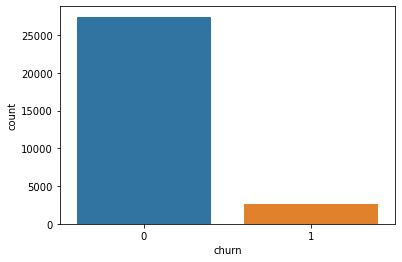

In [33]:
sns.countplot(x='churn',data=df)
# Target variable Converted
# We observe churn percentage is low, and can be further reduced

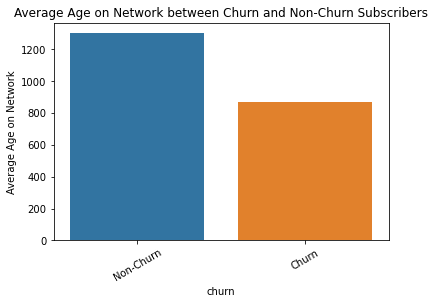

In [34]:
# Analyzing churn vs non-churn average age on network

X1 = df.groupby('churn')['aon'].agg(['mean']).reset_index()
p = sns.barplot(x='churn', y='mean', data=X1)
p.set_xticklabels(['Non-Churn', 'Churn'],rotation=30)
p.set_ylabel('Average Age on Network')
plt.title('Average Age on Network between Churn and Non-Churn Subscribers')
plt.show()

Churn subscriber is having less average AON than Non-Churn Subscriber. So subscribers having low AON, are more likely to churn.

In [35]:
# Create new feature: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
# Sum of Local incoming and outgoing minutes of usage 

for i in range(6,9):
    df['loc_og_to_ic_mou_'+str(i)] = (df['loc_og_mou_'+str(i)])/(df['loc_ic_mou_'+str(i)]+1)

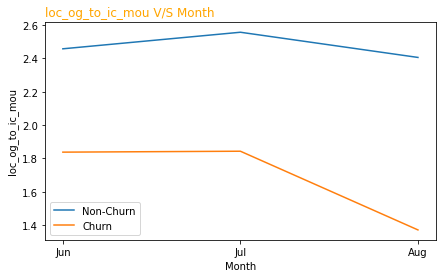

,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
churn,,,
0,2.458019,2.557388,2.406197
1,1.837713,1.843263,1.370921


In [36]:
plot_byChurn(df,'loc_og_to_ic_mou')

It can be observed that,

1.The local outgoing to incoming call mou ratio is genrally low for churners right from the begining of the good phase.

2.Local mou pattern for the non-churners remains almost constant through out the 3 months.

3.The churners genrally show a low loc mou ratio but it drops dramatically after the 2nd month.

4.This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.


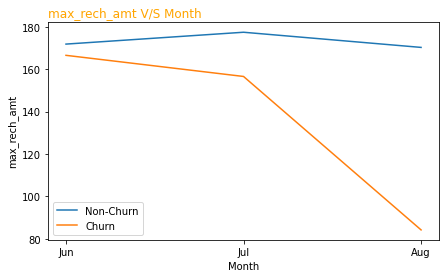

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,171.872456,177.463746,170.309942
1,166.566911,156.599691,84.193598


In [37]:
# By amount recharged

plot_byChurn(df,'max_rech_amt')

There is a marked difference in the max charged amount as churners have a less charging amount initally and this totally drops by the 8th month

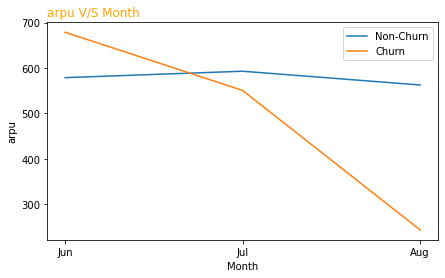

,arpu_6,arpu_7,arpu_8
churn,,,
0,578.63736,592.788162,562.453248
1,678.71697,550.511946,243.063343


In [38]:
# By arpu - average revenue per user

plot_byChurn(df,'arpu')

Average revenue per user,arpu also drops significantly for churners from month Jul(7) to Aug(8).
While it remains almost consistent for the non-churners.


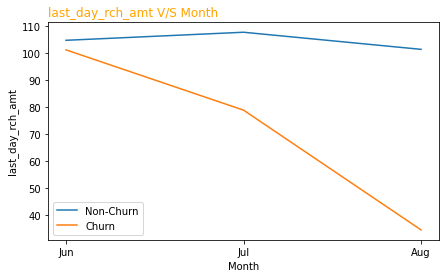

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,104.791925,107.783281,101.440514
1,101.247204,78.893174,34.460085


In [39]:
# By Last day recharge amount

plot_byChurn(df,'last_day_rch_amt')

The avg. last recharge amount for churners is less than half the amount of that of the non-churners.
We can conclude that as the recharge amount reduces for a customer his/her chances to churn increases.

### Step 4 - Checking and Handling Outliers 

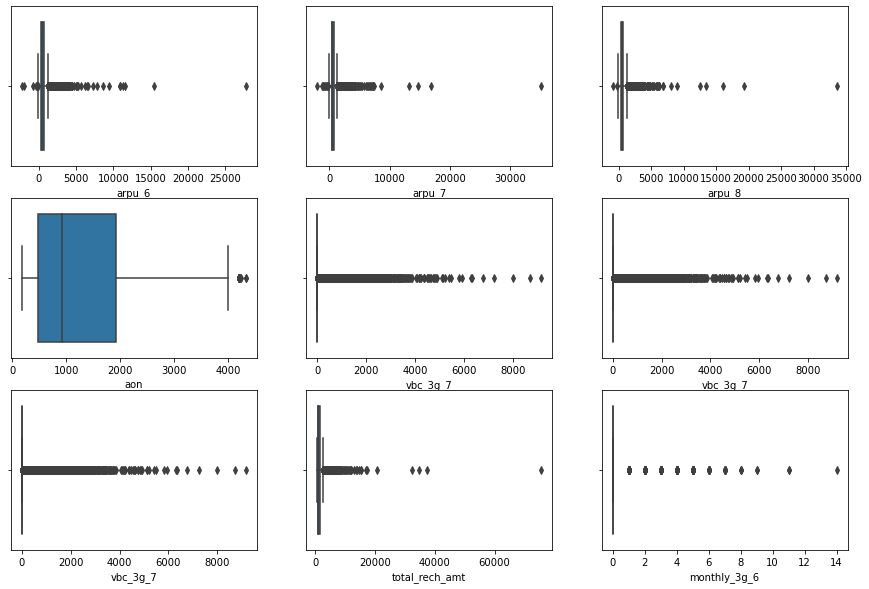

In [40]:
plt.figure(figsize=(15,10))
col=['arpu_6', 'arpu_7', 'arpu_8', 'aon', 'vbc_3g_7',
        'vbc_3g_7', 'vbc_3g_7', 'total_rech_amt', 'monthly_3g_6'] 
for i in enumerate(col):
     plt.subplot(3,3,i[0]+1)
     sns.boxplot(x=i[1],data=df)

In [41]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,index,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt,churn,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
count,30011.000000,3.001100e+04,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,15005.000000,7.001223e+09,0.0,0.0,0.0,587.284404,589.135427,534.857433,297.385708,305.635027,...,0.140415,1264.064776,129.439626,135.127102,121.360548,1393.328713,0.086402,2.404423,2.495686,2.316747
std,8663.573801,6.846405e+05,0.0,0.0,0.0,442.722413,462.897814,492.259586,460.093114,481.133789,...,0.974727,975.263117,390.478591,408.024394,389.726031,977.564176,0.280961,30.696502,41.559855,36.198746
min,0.000000,7.000000e+09,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,0.000000,180.000000,0.000000,0.000000,0.000000,737.000000,0.000000,0.000000,0.000000,0.000000
25%,7502.500000,7.000641e+09,0.0,0.0,0.0,364.161000,365.004500,289.609500,43.510000,43.260000,...,0.000000,480.000000,0.000000,0.000000,0.000000,900.000000,0.000000,0.589087,0.586217,0.523521
50%,15005.000000,7.001232e+09,0.0,0.0,0.0,495.682000,493.561000,452.091000,128.330000,127.950000,...,0.000000,914.000000,0.000000,0.000000,0.000000,1137.000000,0.000000,1.042027,1.030987,0.989804
75%,22507.500000,7.001814e+09,0.0,0.0,0.0,703.922000,700.788000,671.150000,353.310000,359.925000,...,0.000000,1924.000000,1.600000,1.990000,0.000000,1591.000000,0.000000,1.674345,1.671434,1.575757
90%,27009.000000,7.002167e+09,0.0,0.0,0.0,994.099000,995.557000,985.202000,794.980000,824.380000,...,0.000000,2846.000000,438.970000,454.830000,394.500000,2236.000000,0.000000,2.836565,2.821194,2.686993
95%,28509.500000,7.002287e+09,0.0,0.0,0.0,1240.793500,1261.421500,1258.555500,1153.970000,1208.175000,...,1.000000,3179.000000,818.750000,845.315000,761.740000,2812.000000,1.000000,4.267798,4.180748,3.899006
99%,29709.900000,7.002387e+09,0.0,0.0,0.0,1983.089500,1999.374500,1987.934400,2166.370000,2220.367000,...,3.000000,3651.000000,1822.115000,1941.598000,1866.386000,4432.600000,1.000000,12.932617,13.094818,11.432452


In [42]:
#Drop the last Recharge Date and End date of the month columns for all the months

dateCols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8','last_date_of_month_9',
              'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']
df = df.loc[:, ~df.columns.isin(dateCols)]

In [43]:
# Handling outliers by removing them after checking for the values

df = df.drop(df.loc[(df['churn'] == 0) & (
    (df['arpu_6'] > 15000) | (df['arpu_7'] > 20000) | (df['arpu_8'] > 20000) | (df['onnet_mou_8'] > 8000) | 
    (df['offnet_mou_7'] > 9000) | (df['offnet_mou_8'] > 10000) | (df['loc_og_t2t_mou_6'] > 6000) | (df['loc_og_t2t_mou_7'] > 5000) |
    (df['loc_og_t2t_mou_8'] > 6000) | (df['loc_og_t2m_mou_6'] > 4000) | (df['loc_og_t2f_mou_7'] > 600) | (df['loc_og_t2f_mou_8'] > 600) |
    (df['loc_og_t2c_mou_8'] > 250) | (df['loc_og_mou_6'] > 8000) | (df['loc_og_mou_7'] > 6000) | (df['loc_og_mou_8'] > 6000) |
    (df['std_og_t2m_mou_8'] > 8000) | (df['std_og_t2f_mou_6'] > 400) | (df['std_og_t2f_mou_7'] > 400) | (df['std_og_t2f_mou_8'] > 400) |
    (df['std_og_mou_8'] > 10000) | (df['spl_og_mou_7'] > 800) | (df['spl_og_mou_8'] > 600) |(df['total_og_mou_8'] > 8000) |
    (df['loc_ic_t2m_mou_8'] > 3000) | (df['loc_ic_t2f_mou_6'] > 1000) |(df['loc_ic_t2f_mou_8'] > 1000) |(df['loc_ic_mou_8'] > 4000) |
    (df['std_ic_t2m_mou_8'] > 3000) | (df['std_ic_t2f_mou_8'] > 800) | (df['std_ic_mou_8'] > 3000) | (df['total_ic_mou_8'] > 4000) |
    (df['isd_ic_mou_7'] > 3000) | (df['isd_ic_mou_8'] > 2000) | (df['ic_others_8'] > 400) | (df['sachet_2g_8'] > 30) | (df['sachet_3g_8'] > 30)
)].index)

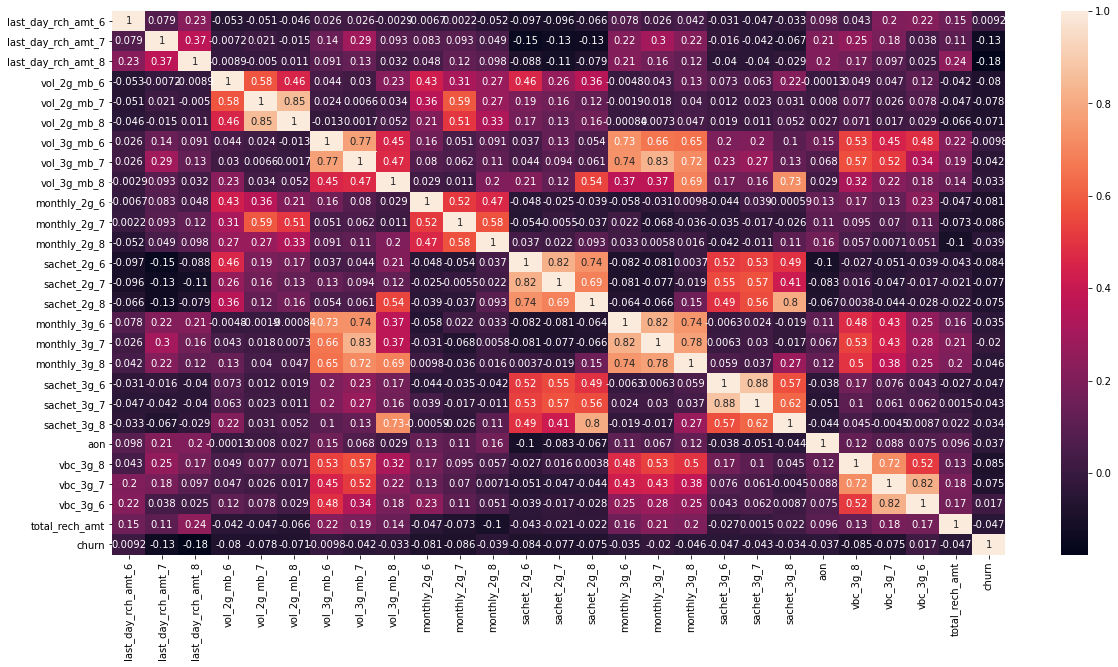

In [44]:
corr_df=df.iloc[450:750,110:137]
plt.figure(figsize = (20,10))      
sns.heatmap(corr_df.corr(),annot = True)
plt.show()


We can roughly see there is correlation between volume of data consumed around the month of July, and churn. 
More proper analysis and prediction will be done as we model our dataset.

## Step 5 - Modeling

We start with a Simple Logisitic Regression Model - For Interpretablity

Next PCA will be performed 

And post PCA we will examine the following models - For Predictability

1.Logistic Regression

2.Decision Tree

3.Random Forest

The following will also be performed in the course of model building :-

1.Handling Class Imbalance

2.Hyperparameter Tuning


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn import metrics

In [46]:
# Defining Function for plotting ROC 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [47]:
# Defining Function to list out the model metrics

def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # Positive Predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative Predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [48]:
# Funtion to predict the churn using the input probability cut-off
# Input arguments: model instance, x and y to predict using model and cut-off probability
# predict

def predictChurnWithProb(model,X,y,prob):
    
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [49]:

# Function to find the optimal cutoff for classifing as churn/non-churn
# Let's create columns with different probability cutoffs 

def findOptimalCutoff(df):
   
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [50]:
# Function for fitting model and generate report

def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [51]:
# Remove the mobile_number column
# Let's preserve the mobile number column to some variable, so that we can make use of it later after perfroming PCA

m_name=df['mobile_number']

In [52]:
# Now we will drop the country column as it is not a predictor in our data.

df1=df.copy()
df1=df1.drop('mobile_number',axis=1)
df1.head()

,index,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt,churn,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
0,0,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,0,802,57.74,19.38,18.74,2370,1,0.984331,1.498779,1.353100
1,1,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,0,315,21.03,910.65,122.16,1038,0,4.586801,11.606122,3.754616
2,2,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,2607,0.00,0.00,0.00,760,0,0.947964,1.972704,1.381370
3,3,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,0,511,0.00,2.45,21.89,918,0,1.136939,0.934194,0.967807
4,4,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0,667,0.00,0.00,0.00,816,0,1.175747,0.000000,0.000000


In [53]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = df1.drop(['churn'], axis=1)

#putting response variables in Y
y = df1['churn']    
    
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [54]:
#Rescaling the features before PCA as it is sensitive to the scales of the features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [55]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

In [56]:
print("Number of Features are {}".format(len(X.columns)))

Number of Features are 138


### Simple Logisitic Regression

In [57]:
# Add Logistic Regression code here 

dflr = LogisticRegression()
dflr.fit(X_train, y_train) 
y_pred = dflr.predict(X_test)

In [58]:
# Using our predefined function we look at the confusion metrics 

pred_lr_test = dflr.predict(X_test)
getModelMetrics(y_test,pred_lr_test)

Roc_auc_score : 0.577306243703884
Sensitivity/Recall : 0.16096324461343473
Specificity: 0.9936492427943332
False Positive Rate: 0.006350757205666829
Positive predictive value: 0.7094972067039106
Negative Predictive value: 0.9247556262786997
sklearn precision score value: 0.7094972067039106


We can clearly see a high class imbalance by the very extreme Recall(Sensitivity) / Specificity values.So we first handle this.


## Handling class imbalance.
Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

In [59]:

print("Count of label '1': {}".format(sum(y_train==1)))
print("Count of label '0': {} \n".format(sum(y_train==0)))
print("Churn Event Rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Count of label '1': 1804
Count of label '0': 19140 

Churn Event Rate : 8.61% 



In [60]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [61]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy= 1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [62]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38280, 138)
After OverSampling, the shape of train_y: (38280,) 

After OverSampling, counts of label '1': 19140
After OverSampling, counts of label '0': 19140
After OverSampling, churn event rate : 50.0% 



## Performing PCA

In [63]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [64]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

In [65]:
pca.explained_variance_ratio_[:50]

array([0.24296121, 0.1581713 , 0.10865274, 0.0739885 , 0.04367925,
       0.04132691, 0.02943602, 0.02648723, 0.02424173, 0.01976265,
       0.01627987, 0.01579256, 0.01248686, 0.01127664, 0.01020638,
       0.01014702, 0.00866131, 0.0083401 , 0.00768923, 0.00628243,
       0.00586511, 0.0056909 , 0.00503412, 0.00495356, 0.00481714,
       0.00460729, 0.0044235 , 0.00410546, 0.00398228, 0.003886  ,
       0.00366793, 0.00341041, 0.00336296, 0.00313437, 0.00295978,
       0.00279088, 0.00267163, 0.00263411, 0.00253352, 0.00234677,
       0.00226454, 0.00215619, 0.00193221, 0.00188855, 0.00172408,
       0.00166564, 0.00165943, 0.00140809, 0.00136628, 0.00128678])

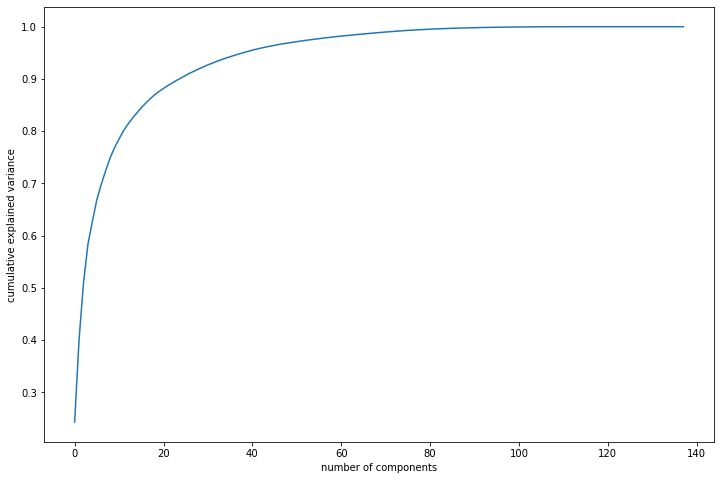

In [66]:
#Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

<BarContainer object of 138 artists>

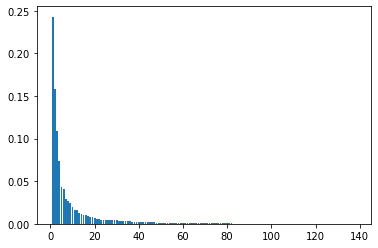

In [67]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [68]:
pca.explained_variance_ratio_[:50]

array([0.24296121, 0.1581713 , 0.10865274, 0.0739885 , 0.04367925,
       0.04132691, 0.02943602, 0.02648723, 0.02424173, 0.01976265,
       0.01627987, 0.01579256, 0.01248686, 0.01127664, 0.01020638,
       0.01014702, 0.00866131, 0.0083401 , 0.00768923, 0.00628243,
       0.00586511, 0.0056909 , 0.00503412, 0.00495356, 0.00481714,
       0.00460729, 0.0044235 , 0.00410546, 0.00398228, 0.003886  ,
       0.00366793, 0.00341041, 0.00336296, 0.00313437, 0.00295978,
       0.00279088, 0.00267163, 0.00263411, 0.00253352, 0.00234677,
       0.00226454, 0.00215619, 0.00193221, 0.00188855, 0.00172408,
       0.00166564, 0.00165943, 0.00140809, 0.00136628, 0.00128678])

In [69]:
#Using incremental PCA for efficiency - We select 50 components

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [70]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38280, 50)

In [71]:

#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.00687307587656195 , min corr:  -0.010776649002868566


There is no correlation between any two components.


In [72]:

#Applying selected components to the test data - 50 components

X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8977, 50)

## Step 6 - Modeling after PCA  

For the prediction of churn customers we will be fit the following models and select one which is the best predictor of churn.

1. Logistic Regression
2. Decision Tree
3. Random Forest

## 1. Logistic Regression
Applying Logistic Regression on obtained principal components

In [73]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr1 = LogisticRegression(class_weight='balanced')
lr1.fit(X_train, y_train) #Use Balanced Data for Logistic Regression
y_pred = lr1.predict(X_test)

In [74]:
modelfit(lr1, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8329
Recall/Sensitivity : 0.848
AUC Score (Train): 0.900917
CV Score : Mean - 0.900009 | Std - 0.005627876 | Min - 0.8902492 | Max - 0.9068177


In [75]:
# predictions on Test data

pred_probs_test = lr1.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.8175372411201158
Sensitivity/Recall : 0.8187579214195184
Specificity: 0.8163165608207132
False Positive Rate: 0.18368343917928676
Positive predictive value: 0.30046511627906974
Negative Predictive value: 0.9790537571407646
sklearn precision score value: 0.30046511627906974


In [76]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8165311351230924
Recall : 0.8187579214195184
Precision : 0.30046511627906974


In [77]:
#Making prediction on the test data
pred_probs_train = lr1.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.9


In [78]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr1,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.832889237199582
Sensitivity/Recall : 0.8479623824451411
Specificity: 0.8178160919540229
False Positive Rate: 0.182183908045977
Positive predictive value: 0.8231475376578588
Negative Predictive value: 0.8432365458169477
sklearn precision score value: 0.8231475376578588


,churn,churn_Prob,final_predicted
0,0,0.069869,0
1,0,0.884636,1
2,0,0.335871,0
3,0,0.137176,0
4,0,0.194640,0


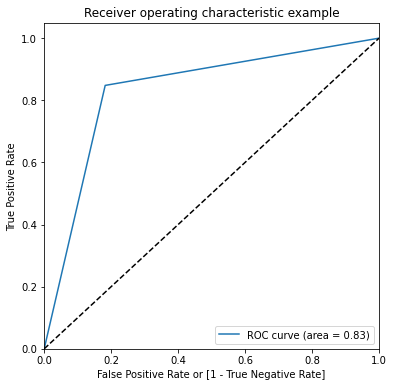

(array([0.        , 0.18218391, 1.        ]),
 array([0.        , 0.84796238, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [79]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

In [80]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.83



Finding Optimal Cutoff Point
Since recall or sensitivity is a much more important metrics for churn prediction. 
A trade off between sensitivity(or recall) and specificity is to be considered in doing so. 
We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.673563  0.977795  0.369331
0.2   0.2  0.742607  0.956374  0.528840
0.3   0.3  0.789446  0.929728  0.649164
0.4   0.4  0.817633  0.892268  0.742999
0.5   0.5  0.832889  0.847962  0.817816
0.6   0.6  0.837121  0.797962  0.876280
0.7   0.7  0.821108  0.725235  0.916980
0.8   0.8  0.759248  0.567607  0.950888
0.9   0.9  0.592450  0.204023  0.980878


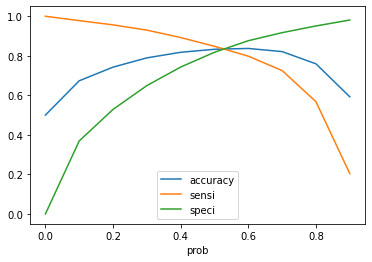

In [81]:

# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

From the curve above, 0.52 is the optimum point .
Although, other cutoff between 0.4 and 0.6 can also be taken but to keep the test sensitivity/recall significant we choose 0.50. 
At this point there is a balance of sensitivity, specificity and accuracy.

In [82]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.50
predictChurnWithProb(lr1,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.832889237199582
Sensitivity/Recall : 0.8479623824451411
Specificity: 0.8178160919540229
False Positive Rate: 0.182183908045977
Positive predictive value: 0.8231475376578588
Negative Predictive value: 0.8432365458169477
sklearn precision score value: 0.8231475376578588


,churn,churn_Prob,final_predicted
0,0,0.069869,0
1,0,0.884636,1
2,0,0.335871,0
3,0,0.137176,0
4,0,0.194640,0
...,...,...,...
38275,1,0.813048,1
38276,1,0.917158,1
38277,1,0.811579,1
38278,1,0.823373,1


The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.

##### Logisitic Regression Training Metrics
Roc_auc_score : 83.29%
Sensitivity/Recall : 84.79%
Specificity: 81.78%
These look good , we will continue with the test data prediction.

### Making prediction on test



In [83]:
# predicting with the choosen cut-off on test
predictChurnWithProb(lr1,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.8175372411201158
Sensitivity/Recall : 0.8187579214195184
Specificity: 0.8163165608207132
False Positive Rate: 0.18368343917928676
Positive predictive value: 0.30046511627906974
Negative Predictive value: 0.9790537571407646
sklearn precision score value: 0.30046511627906974


,churn,churn_Prob,final_predicted
23394,0,0.042242,0
11346,1,0.900180,1
10706,0,0.015033,0
10703,0,0.187928,0
29641,0,0.020089,0
...,...,...,...
11811,0,0.054385,0
7696,0,0.070045,0
10736,0,0.009565,0
21668,0,0.825977,1



The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.


### 2. Decision Tree

Applying Decision Tree Classifier on our principal components with Hyperparameter tuning

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [85]:
dt1 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt1, X_train_pca, y_train_res)


Model Report
Accuracy : 0.7664
Recall/Sensitivity : 0.7756
AUC Score (Train): 0.829807
CV Score : Mean - 0.8157089 | Std - 0.008293925 | Min - 0.804925 | Max - 0.8276576


In [86]:

# make predictions
pred_probs_test = dt1.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7092954355906168
Sensitivity/Recall : 0.6692015209125475
Specificity: 0.7493893502686859
False Positive Rate: 0.25061064973131414
Positive predictive value: 0.20465116279069767
Negative Predictive value: 0.9591996248241363
sklearn precision score value: 0.20465116279069767


In [87]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84      8188
           1       0.20      0.67      0.31       789

    accuracy                           0.74      8977
   macro avg       0.58      0.71      0.58      8977
weighted avg       0.89      0.74      0.80      8977



Even after hyperparameter tuning for the Decision Tree. The recall rate is 66.92% which is not very significant to predict
the churn.



In [88]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [89]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   25.0s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:   39.3s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [90]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.79669508093505 using {'max_depth': 11, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [91]:

# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=20,
                             random_state=10)

In [92]:
modelfit(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8307
Recall/Sensitivity : 0.8316
AUC Score (Train): 0.915548
CV Score : Mean - 0.8884293 | Std - 0.006944082 | Min - 0.8764276 | Max - 0.8967205


In [93]:

# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7553735628447579
Sensitivity/Recall : 0.7046894803548795
Specificity: 0.8060576453346361
False Positive Rate: 0.19394235466536394
Positive predictive value: 0.2593283582089552
Negative Predictive value: 0.9659007756475926
sklearn precision score value: 0.2593283582089552


In [94]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8188
           1       0.26      0.70      0.38       789

    accuracy                           0.80      8977
   macro avg       0.61      0.76      0.63      8977
weighted avg       0.90      0.80      0.83      8977



The recall rate is 67.93% which is not very significant to predict the churn.

Let's see if we can achieve a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [95]:

# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8306687565308255
Sensitivity/Recall : 0.8316091954022988
Specificity: 0.8297283176593522
False Positive Rate: 0.17027168234064785
Positive predictive value: 0.8300479766374635
Negative Predictive value: 0.8312918760469011
sklearn precision score value: 0.8300479766374635


,churn,churn_Prob,final_predicted
0,0,0.006579,0
1,0,0.400000,0
2,0,0.000000,0
3,0,0.000000,0
4,0,0.150000,0


     prob  accuracy     sensi     speci
0.0   0.0  0.604154  1.000000  0.208307
0.1   0.1  0.726071  0.986625  0.465517
0.2   0.2  0.779885  0.963480  0.596290
0.3   0.3  0.811599  0.929258  0.693939
0.4   0.4  0.826463  0.893574  0.759352
0.5   0.5  0.830669  0.831609  0.829728
0.6   0.6  0.824687  0.777116  0.872257
0.7   0.7  0.802900  0.683595  0.922205
0.8   0.8  0.770324  0.585580  0.955068
0.9   0.9  0.710502  0.441954  0.979049


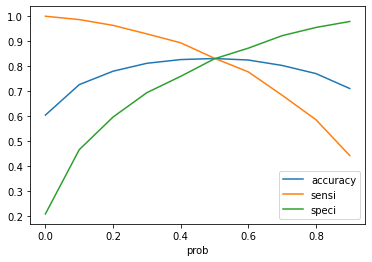

In [96]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [97]:
#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7553735628447579
Sensitivity/Recall : 0.7046894803548795
Specificity: 0.8060576453346361
False Positive Rate: 0.19394235466536394
Positive predictive value: 0.2593283582089552
Negative Predictive value: 0.9659007756475926
sklearn precision score value: 0.2593283582089552


,churn,churn_Prob,final_predicted
23394,0,0.185714,0
11346,1,0.394737,0
10706,0,0.028846,0
10703,0,0.536424,1
29641,0,0.330000,0



Decision tree after selecting optimal cut-off also is resulting in a model with

Roc_auc_score : 73.31%
Sensitivity/Recall : 67.93%
Specificity: 78.70%

Let us consider Random Forest now.

### 3.Random Forest

In [98]:
# Applying Random Forest Classifier on our principal components with Hyperparameter tuning

In [99]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

In [100]:

param = {'max_depth': range(10, 30, 5)}
rf1 = RandomForestClassifier()
rfgs = GridSearchCV(rf1, param, 
                    cv=5, 
                    return_train_score=True,
                   scoring="f1")
rfgs.fit(X_train_pca,y_train_res)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='f1')

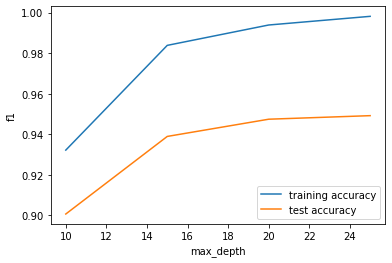

In [101]:
# plotting accuracies with max_depth

scores = rfgs.cv_results_
plot_traintestAcc(rfgs.cv_results_,'max_depth')


Test f1-score almost becomes constant after max_depth=20,we will use this value.

In [102]:

param = {'n_estimators': range(50, 150, 25)}
rf2 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf2, param, 
                    cv=3,
                    return_train_score=True,
                   scoring="recall")

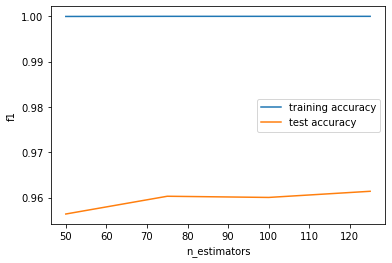

In [103]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

We select n_estimators = 75

In [104]:
# Tuning max_features

param = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_features=20,n_estimators=75,random_state=10)
rfgs = GridSearchCV(rf3, param, 
                    cv=5, 
                    return_train_score=True,
                   scoring="f1")

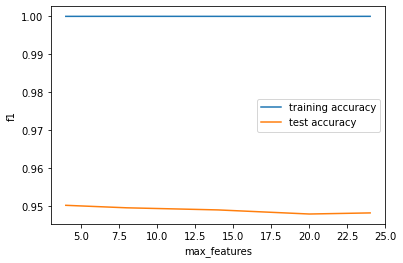

In [105]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'max_features')


Selecting max_features = 5 

#### Tuning min_sample_leaf

In [106]:

param = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,random_state=10)
rfgs = GridSearchCV(rf4, param, 
                    cv=3, 
                    return_train_score=True,
                   scoring="f1")

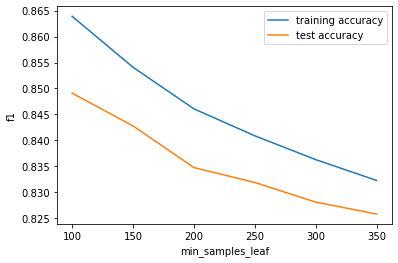

In [107]:

rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_leaf')

Selecting min_sample_leaf = 100 

In [108]:
param = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, param, 
                    cv=3, 
                    return_train_score=True,
                   scoring="f1")

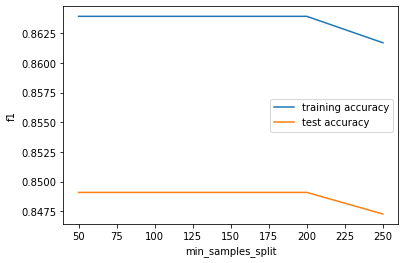

In [109]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_split')

Selecting min_sample_split = 50

#### Tuning Random Forest

In [110]:
rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

In [111]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_pca,y_train_res)

Model performance on Train data:

Model Report
Accuracy : 0.8763
Recall/Sensitivity : 0.8587
AUC Score (Train): 0.946766
CV Score : Mean - 0.930031 | Std - 0.004491392 | Min - 0.921428 | Max - 0.9343164


In [112]:

# predict on test data
predictions = rf_final.predict(X_test_pca)


In [113]:
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.8007013416647937
Sensitivity/Recall : 0.7224334600760456
Specificity: 0.8789692232535418
False Positive Rate: 0.12103077674645824
Positive predictive value: 0.3651505445227418
Negative Predictive value: 0.9704692556634305
sklearn precision score value: 0.3651505445227418


After hyperparameter tuning for the random forest. The Recall rate(Test) is 72.24%

Let's see if we can achieve a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [114]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8762800417972831
Sensitivity/Recall : 0.8586729362591432
Specificity: 0.8938871473354232
False Positive Rate: 0.1061128526645768
Positive predictive value: 0.8900140799306834
Negative Predictive value: 0.8634803674169779
sklearn precision score value: 0.8900140799306834


,churn,churn_Prob,final_predicted
0,0,0.292393,0
1,0,0.664877,1
2,0,0.342480,0
3,0,0.298137,0
4,0,0.289831,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.517503  1.000000  0.035005
0.2   0.2  0.648537  0.998537  0.298537
0.3   0.3  0.792189  0.979728  0.604650
0.4   0.4  0.865099  0.936207  0.793992
0.5   0.5  0.876280  0.858673  0.893887
0.6   0.6  0.839812  0.732079  0.947544
0.7   0.7  0.772283  0.567659  0.976907
0.8   0.8  0.669462  0.346082  0.992842
0.9   0.9  0.562565  0.125601  0.999530


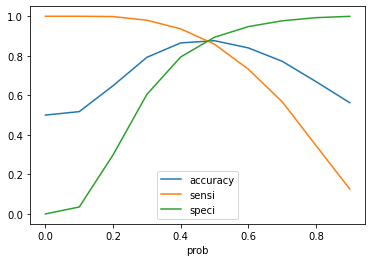

In [115]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

From the curve above, 0.48 is the optimal point with high enough sensitivity.

In [116]:
cut_off_prob=0.48
predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.876619644723093
Sensitivity/Recall : 0.8765412748171368
Specificity: 0.8766980146290491
False Positive Rate: 0.12330198537095088
Positive predictive value: 0.8766786852693734
Negative Predictive value: 0.8765606226819203
sklearn precision score value: 0.8766786852693734


,churn,churn_Prob,final_predicted
0,0,0.292393,0
1,0,0.664877,1
2,0,0.342480,0
3,0,0.298137,0
4,0,0.289831,0
...,...,...,...
38275,1,0.836399,1
38276,1,0.756196,1
38277,1,0.694485,1
38278,1,0.763359,1


### Making prediction on test

In [117]:
y_test_df= predictChurnWithProb(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8070940471789995
Sensitivity/Recall : 0.7515842839036755
Specificity: 0.8626038104543234
False Positive Rate: 0.1373961895456766
Positive predictive value: 0.34516880093131547
Negative Predictive value: 0.9729990356798457
sklearn precision score value: 0.34516880093131547


,churn,churn_Prob,final_predicted
23394,0,0.206338,0
11346,1,0.709595,1
10706,0,0.327245,0
10703,0,0.281968,0
29641,0,0.224316,0


Random Forest after selecting optimal cut-off also is resulting in a model with Train/Test metrics respectively as :

Roc_auc_score : 87.66%
Sensitivity/Recall : 87.65%
Specificity: 87.66%


Roc_auc_score : 80.70%
Sensitivity/Recall : 75.15%
Specificity: 86.26%



### Decision of Final Model
Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives.

So far we got higher recall with Random Forests.

#### Churn Driver Features

In [118]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1)

In [119]:
# Fit the grid search to the data [[RUN LATER]]
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 19.5min
[Parallel(n_jobs=4)]: Done 324 out of 324 | elapsed: 33.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [12, 15, 20],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [120]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9032654127481714 using {'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [121]:
rf = RandomForestClassifier(max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=10)

In [122]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=12, max_features=20, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=10)

We have completed analyzing the churn prediction for the given dataset.We will now enlist some key features and recommendations to reduce churn.

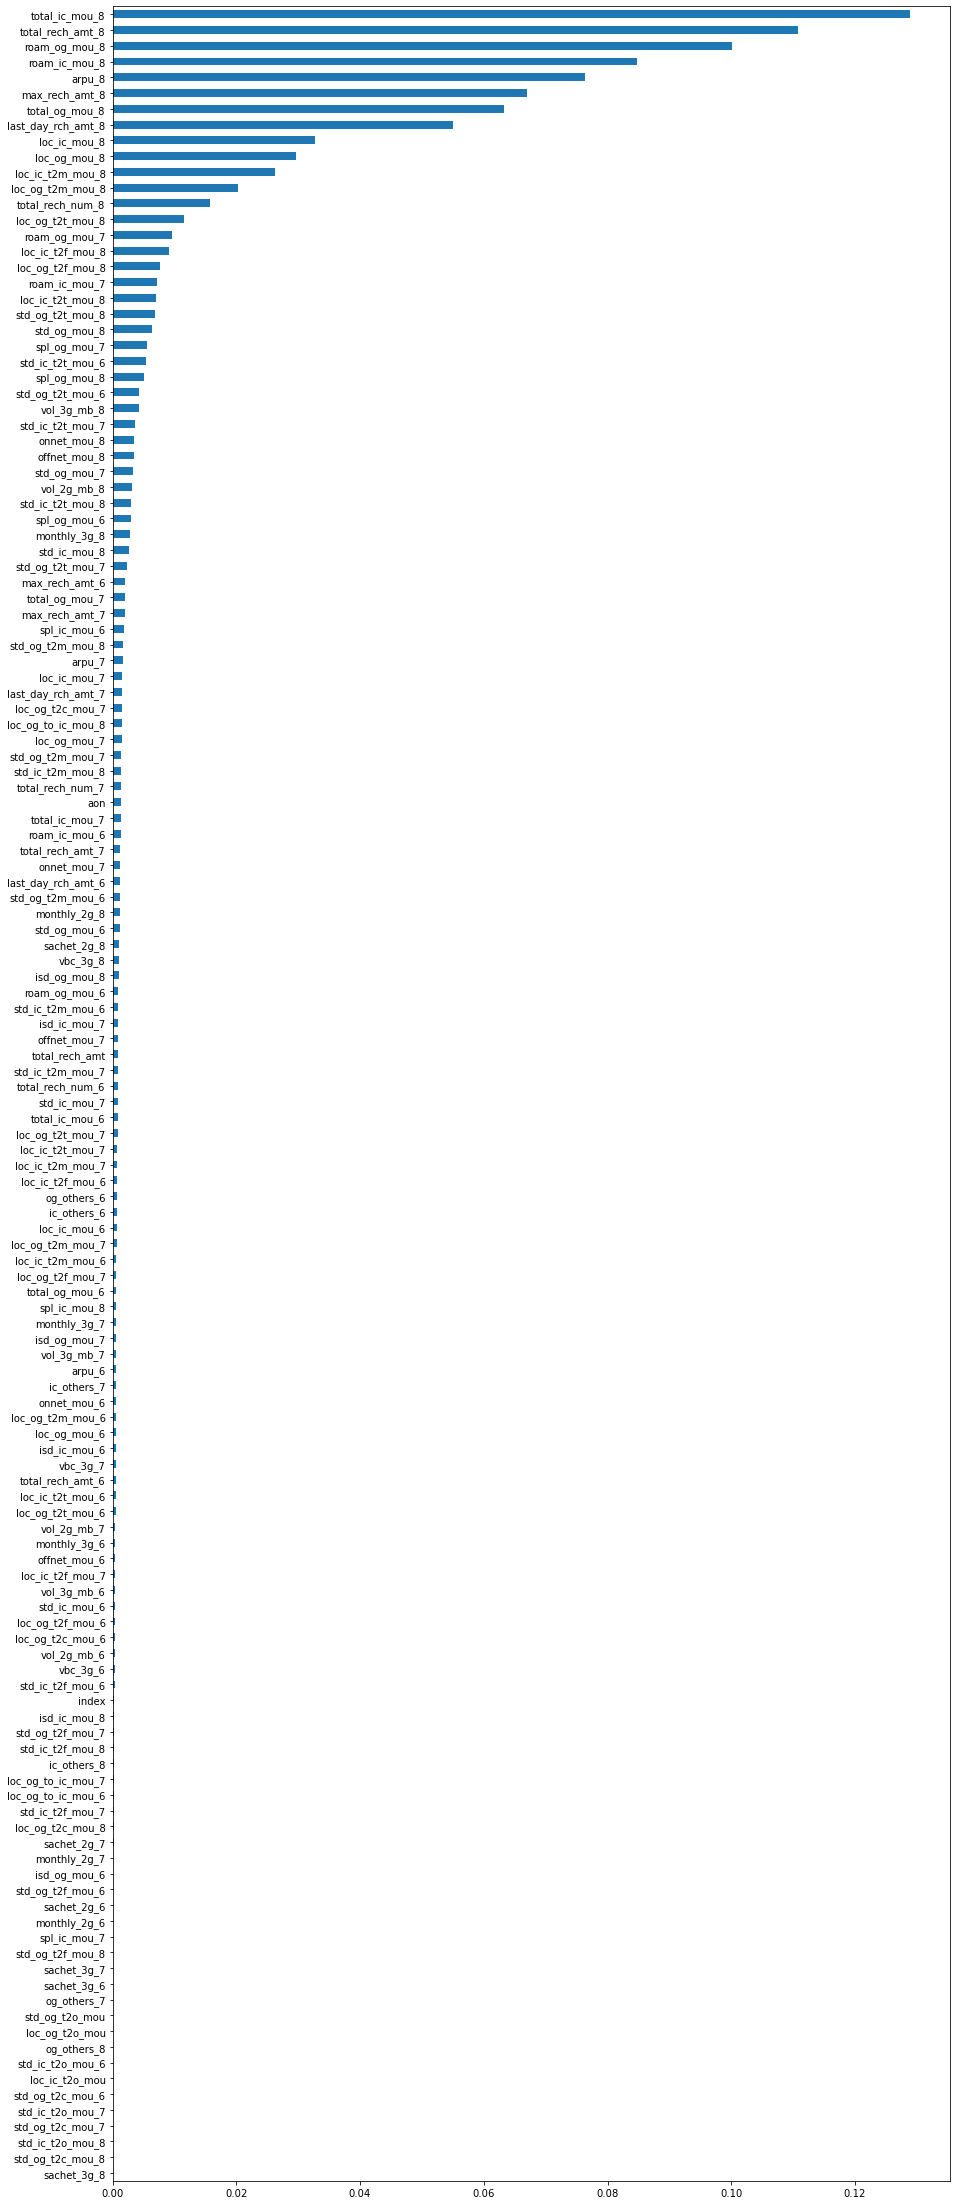

In [123]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

## Model Analysis

The resulting models, after PCA  (with optimal cutoff setting) has different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set for the 3 models considered.

#### Logisitic Regression

##### Train 
Roc_auc_score : 83.29%
Sensitivity/Recall : 84.79%
Specificity: 81.78%


##### Test
Roc_auc_score : 73.31%
Sensitivity/Recall : 67.93%
Specificity: 78.70%

#### Decision Trees


##### Train
Roc_auc_score : 81.51%
Sensitivity/Recall : 82.25%
Specificity: 80.76%

##### Test
Roc_auc_score : 73.31%
Sensitivity/Recall : 67.93%
Specificity: 78.70%

#### Random Forest

##### Train 
Roc_auc_score : 87.66%
Sensitivity/Recall : 87.65%
Specificity: 87.66%

##### Test 
Roc_auc_score : 80.70%
Sensitivity/Recall : 75.15%
Specificity: 86.26%


We observe a high prediction values in train in both the Logistic and Random Forest models , however there is a higher value in the test prediction for the Random Forest, so we recommend use of the same.


## Factors affecting churn

The top 10 features correspond to the customer behaviour in the last two months , most specifically the last month, i.e
8th month as can be seen as follows - 

1.total_ic_mou_8

2.roam_ic_mou_8

3.arpu_8

4.roam_og_mou_8

5.total_rech_amt_8

6.total_og_mou_8

7.last_day_rch_amt_8

8.max_rech_amt_8

9.loc_ic_mou_8

10.loc_og_mou_8

Incoming and outgoing calls being the most important reasons - absence of these lead to the custoer churning.
Here roaming incoming and outgoing calls seem to play an important part.
Total recharge amount in the last month as well as the maximum recharged are almost always low for churn customers.
The telecom company , hence has to address these factors.


## Recommendations to reduce churn

To prevent further churn in high value customer few suggestions can be considered :-
1.The Network operators could investigate their outgoing tariffs, plans and campaigns.

2.Discounted outgoing rates during particular hours of the day for customers according to theircall behaviour.

3.For every X mou, offer % of X free mou and notify through sms/email.

4.Validate outgoing tarrifs plans and make suitable changes.

5.Churners show higher roaming usage than non-churners, so roaming quality of service and tariff should be reasonable.

6.New campaigns which targets the roaming customers can be rolled out and adequately notified.

7.A percentage or allocated free monthly roaming mou's depending on the users past roaming mou usage,
  similar to travel points or credit points.



`